# [Solving Differential Equations](https://colab.research.google.com/drive/14KT0sLGFphRF_QeL8e3by7tfNY0xkzq5#scrollTo=IcvLDTAcuOLC)

Finally, the fun part begins, so we have to choose which system of differential equations we going to solve. I’m showing an example of a more complex system of differential equations, as this will cover the skills required to solve simpler systems.

The system we are solving for today is the Lorenz System, more conmanly know as the butterfly effect.


In [1]:
#Runge-Kutta Method Single Time Step
def rk4(func,t,a,b,c,dt):
    """
    Peforms a single time step of the Runge-Kutta 4th Order Method.
    The below function finds the ki value for [dx,dy,dz] and return the value to move Yn+1
    func is an input of functions, for the Lorenz system this is [dx,dy,dz]
    
    Recall Rk4 Equations :
    k1 = h*f(xn,yn)
    k2 = h*f(xn+h/2,yn+k1/2)
    k3 = h*f(xn+h/2,yn+k2/2)
    k4 = h*f(xn,yn+k3)
    Where f is a function [dx,dy,dz]
    Yn+1 = Yn + 1/6*(k1+k2+k3+k4)
    """
    
    k1,k2,k3,k4 = [],[],[],[]
    for f in func:
        k1.append(dt*f(t,a,b,c))
    for f in func:
        k2.append(dt*f(t+dt/2,a+k1[0]/2,b+k1[1]/2,c+k1[2]/2))
    for f in func:
        k3.append( dt*f(t+dt/2,a+k2[0]/2,b+k2[1]/2,c+k2[2]/2))
    for f in func:
        k4.append( dt*f(t+dt/2,a+k3[0],b+k3[1],c+k3[1]))
    k1,k2,k3,k4 = np.array(k1),np.array(k2),np.array(k3),np.array(k4)
    return (1/6)*(k1+k2+k3+k4)

In [2]:
# Constants of the Lorenz System
b = 8/3
s = 10
r = 28
# Functions dx,dy,dz of the Lorenz System
def dx(t,x,y,z):
    return s*(y-x)
def dy(t,x,y,z):
    return x*(r-z) -y
def dz(t,x,y,z):
    return x*y - b*z

In [3]:
def lorenz(x0,y0,z0,start_time,time_step):
    """
    Returns an array of points, which the lorenz system passes by iteratively perfoming each rk4 timestep
    """
    x,y,z = [x0],[y0],[z0] # Start Points
    count = 0
    t = start_time or 0 # Start Time
    dt = time_step or 0.01 # Time Step
    while t < 150:
        t+= dt
        tempx,tempy,tempz = x[count],y[count],z[count] # Temporary Start Points
        func = np.array([dx,dy,dz])
        runge_kutta_4 = rk4(func,t,tempx,tempy,tempz,dt) # Rk4 Function
        tempx += runge_kutta_4[0]
        tempy += runge_kutta_4[1]
        tempz += runge_kutta_4[2]
        count +=1
        x.append(tempx)
        y.append(tempy)
        z.append(tempz)
    return x,y,z

Text(0.5, 0.92, 'Lorenz Attractor')

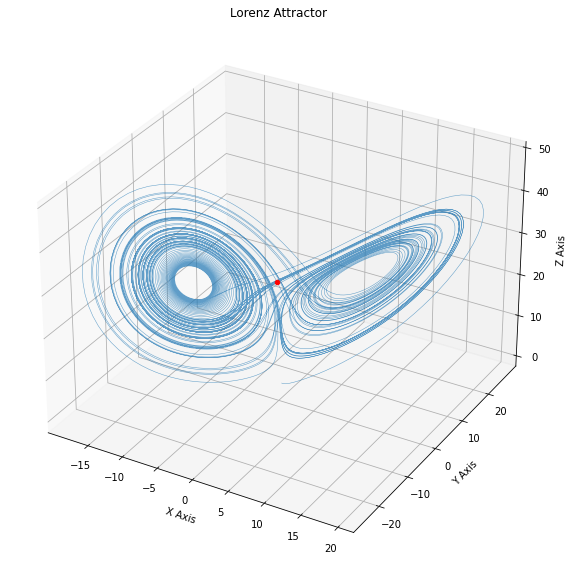

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#Calling the previous function arbitrary start points
x,y,z = lorenz(0,1,1.05,0,0.01)
fig = plt.figure(figsize=(12,10))
# This is how we set the 3D plot
ax = fig.gca(projection='3d')
# Plotting the values
ax.plot(x, y, z, lw=0.5,alpha=0.7)
 
# Plotting the final values
ax.scatter(x[-1],y[-1],z[-1],color=(1,0,0))

#Very slightly different starting values
x_1,y_1,z_1 = lorenz(0,0.9,1.04,0,0.01)

#Plotting slightly different starting values
ax.scatter(x_1[-1],y_1[-1],z_1[-1],color=(0,0,0))

#Setting Axis Titles
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")